In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

def rhs(y, t, k1m, k1p, k3m, k3p, k2, k4, E0):
    
    S, C1, C2 = y;

    E = E0 - C1 - C2;
    
    dS =  -k1p*S*E + k1m*C1 - k3p*S*C1 + k3m*C2;
    dC1 =  k1p*S*E - (k1m+k2)*C1 - k3p*S*C1 + (k4+k3m)*C2;
    dC2 =  k3p*S*C1 - (k4+k3m)*C2;


    return [dS, dC1, dC2];



In [7]:
M = 20; # strong cooperation
M = 1.1 # weak cooperation
M = 2 # neither strong nor weak
k1m = 1.;
k1p = 2./M
k3m = 2.;
k3p = M*1.
k2 = 1.;
k4 = 2.;
E0 = 1.;

P = (k1m, k1p, k3m, k3p, k2, k4, E0)


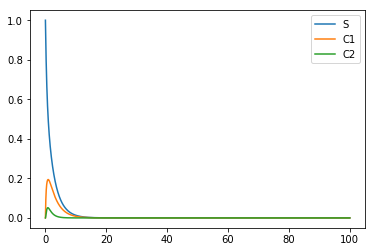

In [8]:
S0 = 1
Y0 = [S0,0,0];
T = np.linspace(0,100,10001);
Y = odeint(rhs, Y0, T, P)


plt.clf()
plt.plot(T,Y);
plt.legend(('S','C1','C2'))
plt.show()


In [9]:
K1 = (k1m+k2)/k1p
K2 = (k4+k3m)/k3p

S = np.linspace(0,10);
c1 = K2*E0*S/(K1*K2 + K2*S + S**2)
c2 = E0*S**2/(K1*K2 + K2*S + S**2)

K = (k1m+k2)/k3p
Vn = 2*k2*E0*S/(K+S)
Vc = k4*E0*S**2/(K1*K2+S**2)
Va = k2*c1+k4*c2


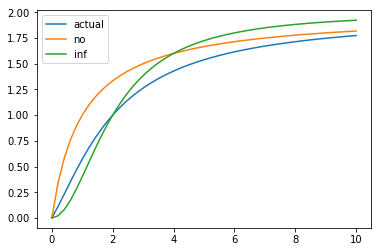

In [10]:
plt.plot(S, Va, S, Vn, S, Vc)
plt.legend(('actual','no','inf'))
plt.show()



In [11]:
# try add a supply term to the ODE system, can you releate that to the production speed?